<a href="https://colab.research.google.com/github/thanupuvvada/Music-Genre-Classification/blob/main/Spam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/spam.csv'
data = pd.read_csv(file_path, encoding='latin-1')

# Display the first few rows of the dataset
data.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [9]:
# Keep only the relevant columns and rename them
data = data[['v1', 'v2']]
data.columns = ['label', 'message']

# Display the first few rows of the cleaned dataset
data.head()


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
import string
import re
from sklearn.model_selection import train_test_split

def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)
    return text

# Apply text preprocessing
data['message'] = data['message'].apply(preprocess_text)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size=0.2, random_state=42)

# Display the first few rows of the training set
X_train.head()


1978    no im in the same boat still here at my moms c...
3989    bank of granite issues strongbuy explosive pic...
3935        they r giving a second chance to rahul dengra
4078             o i played smash bros  ltgt  religiously
4086    private your 2003 account statement for 079737...
Name: message, dtype: object

In [11]:
# Check the column names to ensure they are correctly renamed
data.columns


Index(['label', 'message'], dtype='object')

In [13]:
# Apply text preprocessing (no need to rename columns again)
data['message'] = data['message'].apply(preprocess_text)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size=0.2, random_state=42)

# Display the first few rows of the training set
X_train.head()

1978    no im in the same boat still here at my moms c...
3989    bank of granite issues strongbuy explosive pic...
3935        they r giving a second chance to rahul dengra
4078             o i played smash bros  ltgt  religiously
4086    private your 2003 account statement for 079737...
Name: message, dtype: object

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit the vectorizer to the training data and transform both training and testing data
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [15]:
from sklearn.naive_bayes import MultinomialNB

# Initialize a Multinomial Naive Bayes classifier
model = MultinomialNB()

# Train the model on the training data
model.fit(X_train_tfidf, y_train)


MultinomialNB()

In [16]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the testing data
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.9542600896860987
Confusion Matrix:
 [[965   0]
 [ 51  99]]
Classification Report:
               precision    recall  f1-score   support

         ham       0.95      1.00      0.97       965
        spam       1.00      0.66      0.80       150

    accuracy                           0.95      1115
   macro avg       0.97      0.83      0.88      1115
weighted avg       0.96      0.95      0.95      1115



In [17]:
from sklearn.linear_model import LogisticRegression

# Initialize a Logistic Regression classifier
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize a Logistic Regression classifier
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train_tfidf, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.9668161434977578
Confusion Matrix:
 [[965   0]
 [ 37 113]]
Classification Report:
               precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



In [19]:
from sklearn.svm import SVC

# Initialize an SVM classifier
model = SVC()

# Train the model on the training data
model.fit(X_train_tfidf, y_train)

SVC()

In [20]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize an SVM classifier
model = SVC()

# Train the model on the training data
model.fit(X_train_tfidf, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.9802690582959641
Confusion Matrix:
 [[965   0]
 [ 22 128]]
Classification Report:
               precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       1.00      0.85      0.92       150

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [21]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize models
nb_model = MultinomialNB()
lr_model = LogisticRegression()
svm_model = SVC()

# Train models
nb_model.fit(X_train_tfidf, y_train)
lr_model.fit(X_train_tfidf, y_train)
svm_model.fit(X_train_tfidf, y_train)

# Make predictions
nb_pred = nb_model.predict(X_test_tfidf)
lr_pred = lr_model.predict(X_test_tfidf)
svm_pred = svm_model.predict(X_test_tfidf)

# Evaluate models and store results
results = {}

results['Naive Bayes'] = {
    'accuracy': accuracy_score(y_test, nb_pred),
    'confusion_matrix': confusion_matrix(y_test, nb_pred),
    'classification_report': classification_report(y_test, nb_pred)
}

results['Logistic Regression'] = {
    'accuracy': accuracy_score(y_test, lr_pred),
    'confusion_matrix': confusion_matrix(y_test, lr_pred),
    'classification_report': classification_report(y_test, lr_pred)
}

results['SVM'] = {
    'accuracy': accuracy_score(y_test, svm_pred),
    'confusion_matrix': confusion_matrix(y_test, svm_pred),
    'classification_report': classification_report(y_test, svm_pred)
}

# Print results in a structured way
for model_name, metrics in results.items():
    print(f"--- {model_name} ---")
    print(f"Accuracy: {metrics['accuracy']}")
    print("Confusion Matrix:\n", metrics['confusion_matrix'])
    print("Classification Report:\n", metrics['classification_report'])
    print("\n")

--- Naive Bayes ---
Accuracy: 0.9542600896860987
Confusion Matrix:
 [[965   0]
 [ 51  99]]
Classification Report:
               precision    recall  f1-score   support

         ham       0.95      1.00      0.97       965
        spam       1.00      0.66      0.80       150

    accuracy                           0.95      1115
   macro avg       0.97      0.83      0.88      1115
weighted avg       0.96      0.95      0.95      1115



--- Logistic Regression ---
Accuracy: 0.9668161434977578
Confusion Matrix:
 [[965   0]
 [ 37 113]]
Classification Report:
               precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



--- SVM ---
Accuracy: 0.9802690582959641
Confusion Matrix:
 [[965   0]
 [ 22 128]]
Classification Report

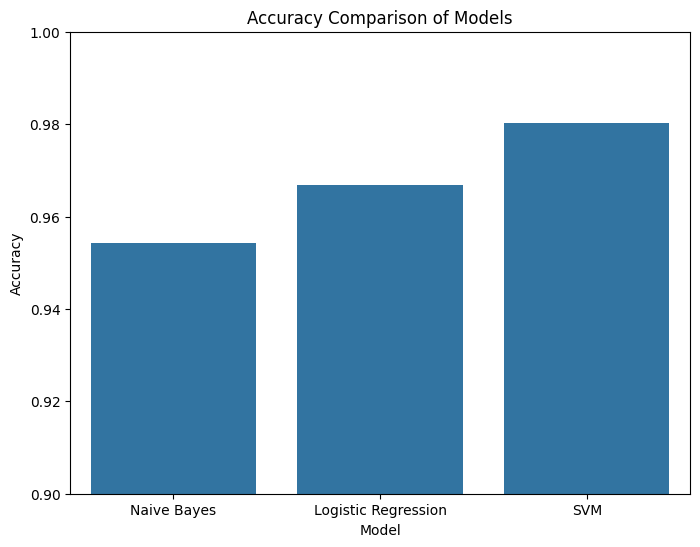

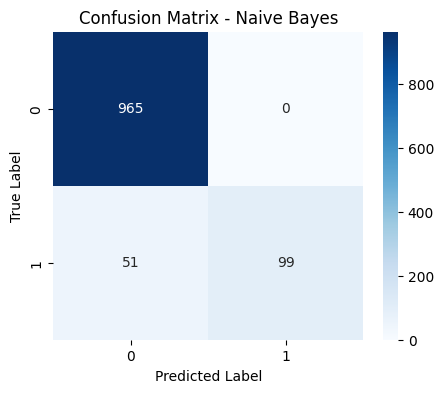

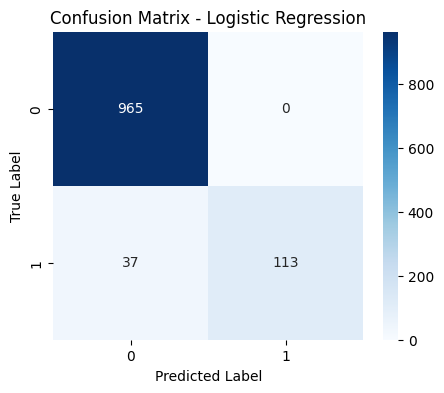

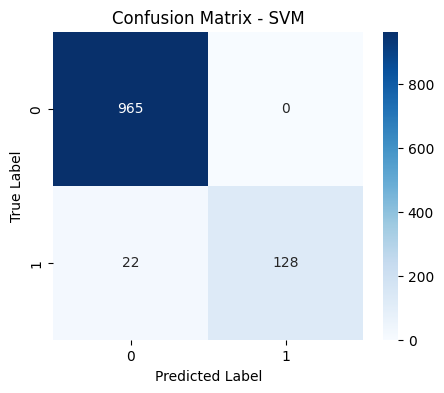

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# ... (previous code for model training and evaluation)

# Extract accuracy scores for visualization
accuracy_scores = [results[model]['accuracy'] for model in results]
model_names = list(results.keys())

# Bar plot for accuracy comparison
plt.figure(figsize=(8, 6))
sns.barplot(x=model_names, y=accuracy_scores)
plt.title('Accuracy Comparison of Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0.9, 1.0)  # Adjust y-axis limits if needed
plt.show()

# Confusion matrices for each model
for model_name, metrics in results.items():
    plt.figure(figsize=(5, 4))
    sns.heatmap(metrics['confusion_matrix'], annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()